In [27]:
import os
import pandas as pd

In [28]:
df = pd.read_csv(os.path.join('data','martinus_vyslo.csv'))

In [14]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_počet_stran', 'M_vazba',
       'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání', 'M_styl', 'M_jazyk',
       'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena', 'M_datum',
       'Přečtená', 'M_pro_koho', 'M_série', 'M_díl', 'E-kniha', 'M_edice',
       'Audiokniha', 'M_věkové_doporučení', 'M_ilustrace', 'M_překlad',
       'M_vydání', 'M_originální_název', 'M_účel_knihy', 'M_ostatní',
       'M_filmové_zpracování', 'M_příloha', 'M_jazyková_úroveň',
       'M_předběžné_datum_vydání', 'M_knižní_předloha'],
      dtype='object')

In [31]:
df['M_hmotnost'] = pd.to_numeric(df['M_hmotnost'].apply(lambda x: str(x).replace(" g","")), errors="coerce")

In [33]:
def na_seznam(x):
    x = str(x)[1:-1].replace("'","")
    x = x.split(", ")
    return [y.strip() for y in x]

In [34]:
df['M_kategorizace'] = df['M_kategorizace'].apply(lambda x: na_seznam(x))

In [39]:
df.groupby("M_autorstvo")['M_hmotnost'].median().nlargest(60)

M_autorstvo
Adéla Ebersonová Lucie Doležalová Michal Dragoun                                                       5110.0
Lubomír Sršeň                                                                                          4642.0
Karel Müller Michal Šimůnek Karel Podolský                                                             4459.0
Tomáš Míček                                                                                            4366.0
Slavena Rohlíková                                                                                      4338.0
Miroslav Zavoral                                                                                       4288.0
Miloslav Jenšík                                                                                        4200.0
Helena Březinová Jana Bureš Víchová Milena Bravermanová                                                4154.0
Marcela Titzlová                                                                                       4069.

In [36]:
kategorizace = df.explode("M_kategorizace")
kategorizace.groupby("M_kategorizace")['M_hmotnost'].median().nlargest()

M_kategorizace
Urologie                           1448.5
Praktické lékařství pro dospělé    1380.0
Veterinární lékařství              1375.0
Úrazová chirurgie a ortopedie      1222.0
Oftalmologie a otolaryngologie     1186.0
Name: M_hmotnost, dtype: float64

In [25]:
df.groupby('M_kategorizace').size().nlargest()

M_kategorizace
['Knihy', 'Beletrie']                                                        1249
['Knihy', 'Beletrie', 'Poezie']                                              1169
['Knihy', 'Beletrie', 'Společenská beletrie', 'Knihy', 'Beletrie']            658
['Knihy', 'Beletrie', 'Společenská beletrie']                                 620
['Knihy', 'Odborné a naučné', 'Humanitní a společenské vědy', 'Historie']     364
dtype: int64

In [19]:
df.groupby('M_ilustrace').size().nlargest(20)

M_ilustrace
Iva Hüttnerová        13
Adolf Born            12
Helena Zmatlíková     12
Erika Bornová         10
Eva Bartošová          8
Jiří Slíva             8
Miroslav Růžek         8
Adéla Stopka           7
Petr Urban             6
Tereza Budilová        6
Daggy                  5
Filip Štorch           5
Kateřina Coufalová     5
Libor Drobný           5
Lubomír Kupčík         5
Richard Šmarda         5
Tereza Basařová        5
Andrea Tachezy         4
Atila Vörös            4
Barbora Kyšková        4
dtype: int64

In [6]:
df.groupby('M_rok_vydání').size()

M_rok_vydání
1989.0       1
1997.0       1
1998.0       1
1999.0       1
2000.0       1
2001.0       2
2002.0       6
2003.0       2
2004.0       1
2005.0       9
2006.0       4
2007.0      10
2008.0      12
2009.0      15
2010.0      18
2011.0      23
2012.0      28
2013.0      32
2014.0      33
2015.0      47
2016.0      68
2017.0     501
2018.0     671
2019.0     816
2020.0     741
2021.0    2192
2022.0    3027
2023.0    2702
2024.0     609
2032.0       1
dtype: int64

<Axes: ylabel='Frequency'>

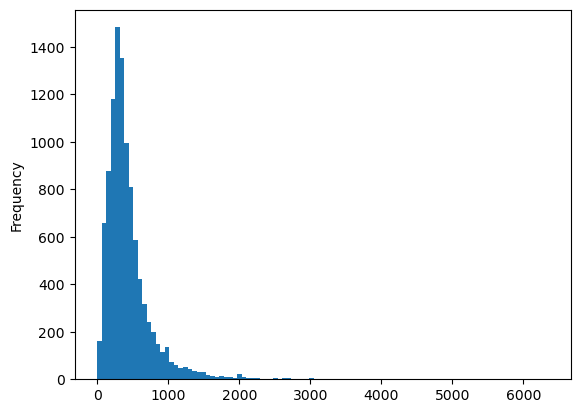

In [11]:
df['M_hmotnost'].plot.hist(bins=100)

In [12]:
df['M_hmotnost'].median()

352.0

In [13]:
df['M_počet_stran'].median()

208.0